In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="ticks")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV,cross_validate
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
col_names=["sepal length in cm",
   "sepal width in cm",
   "petal length in cm",
   "petal width in cm",
   "species"]
df=pd.read_csv("iris_data.txt",names=col_names)

In [4]:
df

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


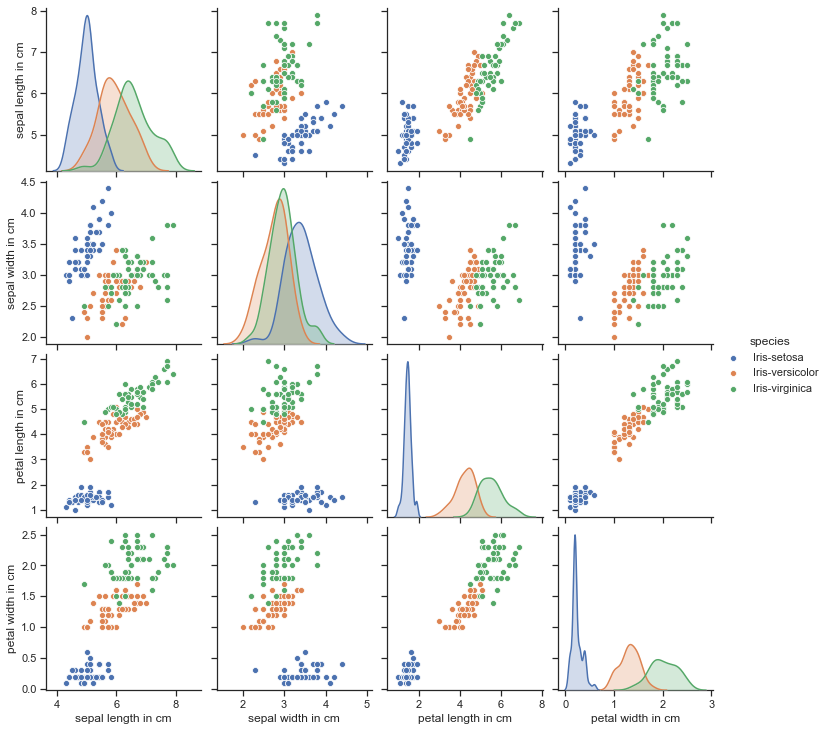

In [5]:
sns.pairplot(df,hue="species")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   species             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<AxesSubplot:>

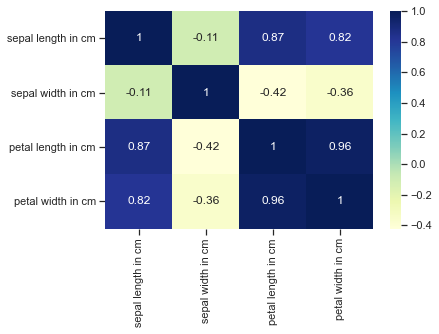

In [7]:
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [8]:
X=df.iloc[:,0:4]
y=df["species"]
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

(150, 4)
(150,)


# Clasificacion por K Neighbors

In [9]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)
y_pred_neigh=neigh.predict(X_test)

In [10]:
accuracy_score(y_test,y_pred_neigh)

0.9666666666666667

In [11]:
params={"n_neighbors":np.arange(1,20,2),
       "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute']}
grid=GridSearchCV(KNeighborsClassifier(),param_grid=params)

In [12]:
grid.fit(X,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])})

In [13]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.n_splits_)

{'algorithm': 'auto', 'n_neighbors': 7}
KNeighborsClassifier(n_neighbors=7)
0.9800000000000001
5


# Clasificacion por Gaussian NB

In [14]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)
accuracy_score(y_test,y_pred_gnb)

1.0

# Clasificacion Linear SVC

In [15]:
LSVC = LinearSVC(C=0.1)
LSVC.fit(X_train,y_train)
y_pred_LSVC=LSVC.predict(X_test)
accuracy_score(y_test,y_pred_LSVC)

1.0

# Clasificación por Decision Tree 

In [16]:
dtree=DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train,y_train)
y_pred_dtree=dtree.predict(X_test)
accuracy_score(y_test,y_pred_dtree)

0.9

In [17]:
params_tree={"criterion":["gini", "entropy"],
       "splitter":['best', 'random'],
        "max_depth":np.arange(1,20)}
grid_tree=GridSearchCV(DecisionTreeClassifier(),param_grid=params_tree)
grid_tree.fit(X_train,y_train)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)
print(grid_tree.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}
DecisionTreeClassifier(max_depth=5, splitter='random')
0.95
